In [148]:
import pandas as pd
from itertools import chain
import regex as re
from underthesea import word_tokenize


In [149]:
df = pd.read_csv("../data/procedure.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2038 entries, 0 to 2037
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   procedure_name  2038 non-null   object
dtypes: object(1)
memory usage: 16.0+ KB


In [150]:
# new_df = df.drop_duplicates()
# new_df.to_csv('../data/new_procedure.csv', index=False)

In [151]:
# df = pd.read_csv('../data/new_procedure.csv')
# df.head()

In [152]:
# f = open('../data/ongia_VA.txt', 'r', encoding='utf-8')
# f_new = open('../data/procedure.txt', 'w', encoding='utf-8')
# procedures = f.readlines()
# for procedure in procedures:
#     procedure = procedure.replace('\n','')
#     f_new.write(procedure+'\t'+procedure)
#     f_new.write('\n')
# f_new.close()


In [153]:
df = pd.read_csv('../data/new_procedure.csv')

In [154]:
df.head()

,procedure_name
0,thủ tục chuyển nhượng toàn bộ hoặc một phần dự...
1,thủ tục cấp mới chứng chỉ hành nghề môi giới b...
2,thủ tục cấp lại (cấp đổi) chứng chỉ hành nghề ...
3,thủ tục thông báo nhà ở hình thành trong tương...
4,"thủ tục cho thuê, thuê mua nhà ở xã hội thuộc ..."


In [155]:
procedure_list = df.procedure_name.values.tolist()

In [156]:
procedure_list[:5]

['thủ tục chuyển nhượng toàn bộ hoặc một phần dự án bất động sản do ubnd cấp tỉnh quyết định việc đầu tư',
 'thủ tục cấp mới chứng chỉ hành nghề môi giới bất động sản',
 'thủ tục cấp lại (cấp đổi) chứng chỉ hành nghề môi giới bất động sản do bị mất, bị rách, bị cháy, bị hủy hoại do thiên tai hoặc lý do bất khả kháng hoặc cấp lại chứng chỉ hành nghề môi giới bất động sản do hết hạn (hoặc gần hết hạn)',
 'thủ tục thông báo nhà ở hình thành trong tương lai đủ điều kiện được bán, cho thuê mua',
 'thủ tục cho thuê, thuê mua nhà ở xã hội thuộc sở hữu nhà nước']

In [157]:
tokens = []

In [158]:

for line in procedure_list:
    tokens += word_tokenize(line)
vocab = list(set(tokens))

In [159]:
vocab[:5]

['chấp thuận', 'giải phóng', 'mục đích', 'nhập cảnh', 'chung cư']

In [160]:
def lcs(X, Y):
    # find the length of the strings
    m = len(X)
    n = len(Y)

    # declaring the array for storing the dp values
    L = [[None] * (n + 1) for i in range(m + 1)]

    """Following steps build L[m + 1][n + 1] in bottom up fashion
    Note: L[i][j] contains length of LCS of X[0..i-1]
    and Y[0..j-1]"""
    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0 or j == 0:
                L[i][j] = 0
            elif X[i - 1] == Y[j - 1]:
                L[i][j] = L[i - 1][j - 1] + 1
            else:
                L[i][j] = max(L[i - 1][j], L[i][j - 1])

    return L[m][n]


In [161]:
def load_dict_values(dict_file):
    fin = open(dict_file, 'r', encoding='utf-8')
    lines = fin.readlines()
    fin.close()
    values_dict = []
    for line in lines:
        # print('line : ', line)
        items = line.strip().split('\t')
        # print('items : ', items)
        if len(items) == 2:
            words = items[0].lower().split()
            values_dict.append((words, items[1]))
    return values_dict


In [162]:
list_procedure = load_dict_values('../data/procedure.txt')
list_procedure[:5]


[(['thủ',
   'tục',
   'chuyển',
   'nhượng',
   'toàn',
   'bộ',
   'hoặc',
   'một',
   'phần',
   'dự',
   'án',
   'bất',
   'động',
   'sản',
   'do',
   'ubnd',
   'cấp',
   'tỉnh',
   'quyết',
   'định',
   'việc',
   'đầu',
   'tư'],
  'Thủ tục chuyển nhượng toàn bộ hoặc một phần dự án bất động sản do UBND cấp tỉnh quyết định việc đầu tư'),
 (['thủ',
   'tục',
   'cấp',
   'mới',
   'chứng',
   'chỉ',
   'hành',
   'nghề',
   'môi',
   'giới',
   'bất',
   'động',
   'sản'],
  'Thủ tục cấp mới chứng chỉ hành nghề môi giới bất động sản'),
 (['thủ',
   'tục',
   'cấp',
   'lại',
   '(cấp',
   'đổi)',
   'chứng',
   'chỉ',
   'hành',
   'nghề',
   'môi',
   'giới',
   'bất',
   'động',
   'sản',
   'do',
   'bị',
   'mất,',
   'bị',
   'rách,',
   'bị',
   'cháy,',
   'bị',
   'hủy',
   'hoại',
   'do',
   'thiên',
   'tai',
   'hoặc',
   'lý',
   'do',
   'bất',
   'khả',
   'kháng',
   'hoặc',
   'cấp',
   'lại',
   'chứng',
   'chỉ',
   'hành',
   'nghề',
   'môi',
   'giới',
 

In [163]:
def find_best_matching_in_dict(query, values_dict):
    query_words = query.lower().split()
    max_ratio = 0
    str_found = ""
    for words, v in values_dict:
        r = 1.0 * lcs(words, query_words) / len(words)
        if r > max_ratio:
            max_ratio = r
            str_found = v
    return str_found


In [164]:
mingg = find_best_matching_in_dict('kết hôn lại', load_dict_values('../data/procedure.txt'))
mingg

'Thủ tục đăng ký kết hôn'

In [165]:
def search_in_database(user_token):
    df = pd.read_csv('../data/new_procedure.csv')
    procedures = df[df.procedure_name.str.contains(user_token, na=False)]
    # flatten 2d list
    procedure_list = list(chain.from_iterable(procedures.values.tolist()))
    procedure_list = sorted(procedure_list, key=len)
    return procedure_list


In [166]:
def remove_dup(result_list):
    return list(dict.fromkeys(result_list))


In [167]:
kh = search_in_database('kết hôn')
kh

['thủ tục đăng ký kết hôn',
 'thủ tục đăng ký lại kết hôn',
 'thủ tục đăng ký kết hôn lưu động',
 'thủ tục đăng ký kết hôn có yếu tố nước ngoài',
 'thủ tục đăng ký lại kết hôn có yếu tố nước ngoài',
 'thủ tục ghi vào sổ hộ tịch việc kết hôn của công dân việt nam đã được giải quyết tại cơ quan có thẩm quyền của nước ngoài',
 'thủ tục ghi vào sổ hộ tịch việc ly hôn, hủy việc kết hôn của công dân việt nam đã được giải quyết tại cơ quan có thẩm quyền của nước ngoài']

In [168]:
user_sent = "đăng ký kết hôn"
tmp = [user_sent]
tmp

['đăng ký kết hôn']

In [169]:
def ranking_result(user_sent:str):
    values_dict = load_dict_values('../data/procedure.txt')
    best_matching = find_best_matching_in_dict(user_sent, values_dict)
    user_tokens = word_tokenize(user_sent)
    tmp =[]
    for token in user_tokens:
        tmp += search_in_database(token)
    unique_list = []
    dup_list = []
    for element in tmp:
        if element not in unique_list:
            unique_list.append(element)
        else:
            dup_list.append(element)
    dup_list = remove_dup(dup_list)
    for element in dup_list:
        if element in unique_list:
            unique_list.remove(element)
    if len(dup_list) == 0:
        return unique_list[:5]
    elif len(dup_list) <5 :
        n = 5 - len(dup_list)
        if best_matching:
            result = [best_matching] + dup_list + unique_list[:10]
            result = remove_dup(result)
            return result[:5]
        else :
            result = dup_list + unique_list[:5-n]
            return result[:5]
    else:
        if best_matching in dup_list:
            result = [best_matching] + dup_list
            result = remove_dup(result)
            return result[:5]
        else:
            return dup_list[:5]

In [170]:
mingg = ranking_result('khai sinh lại đăng ký')
mingg

['thủ tục đăng ký lại khai sinh',
 'thủ tục đăng ký lại khai sinh có yếu tố nước ngoài',
 'thủ tục đăng ký khai sinh',
 'thủ tục đăng ký lại khai tử',
 'thủ tục đăng ký lại kết hôn']

In [171]:
len(vocab)

1742

In [172]:
vocab_file = open('../data/vocab.txt','w',encoding='utf-8')
for token in vocab:
    vocab_file.write(token)
    vocab_file.write('\n')
vocab_file.close()

In [173]:
vocab_file = open('../data/vocab.txt', 'r', encoding='utf-8')
vocab = vocab_file.readlines()


In [174]:
len(vocab)

1742

In [175]:
_dict = {}

In [176]:
for token in vocab:
    token = token.replace('\n','')
    frequency = len(search_in_database(token))
    _dict.update({token: frequency})

error: unbalanced parenthesis at position 0

In [ ]:
_dict

{'nhập cảnh': 1,
 'ban hành': 5,
 'sxtn': 1,
 'bỏ rơi': 1,
 'gia hạn': 56,
 'phục vụ': 18,
 'năng khiếu': 2,
 'công-ten-nơ': 2,
 'thời điểm': 2,
 'kết hợp': 3,
 'kiến trúc': 6,
 'hình thành': 4,
 'trò chơi': 10,
 'nhằm': 5,
 'viên chức': 22,
 'ưu đãi': 28,
 'mang': 5,
 'atvstp01': 1,
 'nghĩa trang': 2,
 'tốt nghiệp': 3,
 'kinh doanh': 153,
 'mảnh': 3,
 'xét nghiệm': 5,
 'mức sống': 1,
 'campuchia': 10,
 'lâp': 1,
 'việc làm': 11,
 'giao kết': 2,
 'môi trường': 26,
 'thể hình': 1,
 'sót': 6,
 'công chứng nhận': 2,
 'phụ thuộc': 1,
 'kê': 12,
 'nhưng': 12,
 'nhà tu hành': 3,
 'nguy cấp': 3,
 'tranh hoành tráng': 17,
 'duy nhất': 1,
 'nút': 4,
 'thủy lợi': 8,
 'lpg': 15,
 'sáp nhập': 33,
 'kết cấu hạ tầng': 5,
 'thủ công': 3,
 'lĩnh vực': 6,
 'này': 4,
 'sản phẩm': 26,
 'bảo trợ': 3,
 'quyết': 147,
 'ươm': 1,
 'khuyến mại': 4,
 'phiếu': 7,
 'kết thúc': 1,
 'vật thể': 2,
 'thương binh': 17,
 'điện áp': 4,
 'trang trại': 2,
 'số lượng': 4,
 'góp': 20,
 'nghiện': 9,
 'chủ lực': 1,
 'điều khi

In [ ]:
keys = []
values = []
for key in _dict.keys():
    keys.append(key)
for value in _dict.values():
    values.append(value)


In [ ]:
print(keys[:10])
values[:10]


['nhập cảnh', 'ban hành', 'sxtn', 'bỏ rơi', 'gia hạn', 'phục vụ', 'năng khiếu', 'công-ten-nơ', 'thời điểm', 'kết hợp']


[1, 5, 1, 1, 56, 18, 2, 2, 2, 3]

In [ ]:
d = {'token': keys, 'frequency': values}
df = pd.DataFrame(data=d)
df.head()


,token,frequency
0,nhập cảnh,1
1,ban hành,5
2,sxtn,1
3,bỏ rơi,1
4,gia hạn,56


In [ ]:
df.to_csv('../data/token_frequency.csv',index=False)

In [ ]:
df = pd.read_csv('../data/token_frequency.csv')
df.head()

,token,frequency
0,thủ,966
1,thủ tục,896
2,cấp,818
3,. cấp,579
4,giấy,578


In [ ]:
df = df.sort_values(by='frequency', ascending=False)

In [ ]:
df.head(10)

,token,frequency
0,thủ,966
1,thủ tục,896
2,cấp,818
3,. cấp,579
4,giấy,578
5,ăn,457
6,nhận,446
7,ở,436
8,của,426
9,cô,423


In [ ]:
from matplotlib import pyplot

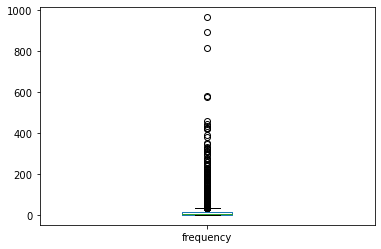

In [ ]:
df.plot(kind='box',subplots = True, sharex = False)
pyplot.show()

In [ ]:
df_filtered = df[df['frequency'] <= 60]

In [ ]:
len(df_filtered)

1487

In [ ]:
df_filtered.to_csv('../data/top_token_frequency.csv',index=False)

In [ ]:
df.to_csv('../data/token_frequency.csv',index=False)

In [ ]:
a = list(['']*1487)

In [ ]:
len(a)

1487

In [ ]:
df_filtered.head()

,token,frequency
145,giao,60
146,cơ quan,60
147,quản lý,60
148,quyết định,60
149,bản,59


In [ ]:
df2 = df_filtered.assign(lemma=a)

In [ ]:
df2.to_csv('../data/need_token.csv',index=False,encoding='utf-8-sig')

In [ ]:
for item in df2.token:
    print(item)
    break

giao


In [ ]:
df2.head()

,token,frequency,lemma
145,giao,60,
146,cơ quan,60,
147,quản lý,60,
148,quyết định,60,
149,bản,59,


In [ ]:
df3 = pd.read_csv('../data/need_token_edited.csv')

In [ ]:
df3_nonNan = df3.dropna()

In [ ]:
df3_nonNan.reset_index()

,index,token,frequency,lemma
0,296,ô tô,13,oto
1,508,kết hôn,7,cưới
2,710,photocopy,4,photo
3,754,di dời,3,dời đi
4,757,huy chương,3,huân chương
5,760,toàn bộ,3,tất cả
6,765,đăng ký kết hôn,3,"đăng ký hôn nhân, đăng ký cưới xin, đăng ký cư..."
7,781,du học,3,"học nước ngoài, đi học nước ngoài"
8,799,thuế,3,thuế má
9,823,thức ăn,3,đồ ăn


In [ ]:
df3_nonNan.head()

,token,frequency,lemma
296,ô tô,13,oto
508,kết hôn,7,cưới
710,photocopy,4,photo
754,di dời,3,dời đi
757,huy chương,3,huân chương


In [179]:
lemma = df3_nonNan.lemma.values.tolist()

In [180]:
token = df3_nonNan.token.values.tolist()

In [189]:
for i in range(len(lemma)):
    l,t = lemma[i],token[i]
    string_lemma = '"'+('","'.join(l.split(',')))+'"'
    result = '"'+t+'":["'+t+'",'+string_lemma+'],'
    print(result)

"ô tô":["ô tô","oto"],
"kết hôn":["kết hôn","cưới"],
"photocopy":["photocopy","photo"],
"di dời":["di dời","dời đi"],
"huy chương":["huy chương","huân chương"],
"toàn bộ":["toàn bộ","tất cả"],
"đăng ký kết hôn":["đăng ký kết hôn","đăng ký hôn nhân"," đăng ký cưới xin"," đăng ký cưới"," đăng kí cưới"," đăng kí cưới xin"," đăng ký hôn nhân"],
"du học":["du học","học nước ngoài"," đi  học nước ngoài"],
"thuế":["thuế","thuế má"],
"thức ăn":["thức ăn","đồ ăn"],
"con đẻ":["con đẻ","con ruột"],
"bất động sản":["bất động sản","địa ốc"],
"thương lượng":["thương lượng","đàm phán"],
"chặt hạ":["chặt hạ","đốn hạ"],
"luồng lạch":["luồng lạch","luồn lách"],
"cơ sở vật chất":["cơ sở vật chất","csvc"],
"khoa học xã hội":["khoa học xã hội","khxh"],
"công khai":["công khai","công bố"],
"hôn nhân":["hôn nhân","hôn lễ"],
"hoãn":["hoãn","trì hoãn"],
"nhà đất":["nhà đất","nhà ở và đất đai"],
"tiền lương":["tiền lương","lương"],
"đầu tư sản xuất":["đầu tư sản xuất","đầu tư sx"],
"chứng khoán":["chứng khoán",

{"ô tô":["ô tô","oto"],
"kết hôn":["kết hôn","cưới"],
"photocopy":["photocopy","photo"],
"di dời":["di dời","dời đi"],
"huy chương":["huy chương","huân chương"],
"toàn bộ":["toàn bộ","tất cả"],
"đăng ký kết hôn":["đăng ký kết hôn","đăng ký hôn nhân"," đăng ký cưới xin"," đăng ký cưới"," đăng kí cưới"," đăng kí cưới xin"," đăng ký hôn nhân"],
"du học":["du học","học nước ngoài"," đi  học nước ngoài"],
"thuế":["thuế","thuế má"],
"thức ăn":["thức ăn","đồ ăn"],
"con đẻ":["con đẻ","con ruột"],
"bất động sản":["bất động sản","địa ốc"],
"thương lượng":["thương lượng","đàm phán"],
"chặt hạ":["chặt hạ","đốn hạ"],
"luồng lạch":["luồng lạch","luồn lách"],
"cơ sở vật chất":["cơ sở vật chất","csvc"],
"khoa học xã hội":["khoa học xã hội","khxh"],
"công khai":["công khai","công bố"],
"hôn nhân":["hôn nhân","hôn lễ"],
"hoãn":["hoãn","trì hoãn"],
"nhà đất":["nhà đất","nhà ở và đất đai"],
"tiền lương":["tiền lương","lương"],
"đầu tư sản xuất":["đầu tư sản xuất","đầu tư sx"],
"chứng khoán":["chứng khoán","chung khoan"],
"nông lâm":["nông lâm","lâm nông"],
"lao động-thương binh":["lao động-thương binh","lđtb"],
"an toàn lao động":["an toàn lao động","atlđ"],
"trực tuyến":["trực tuyến","online"],
"tố tụng":["tố tụng","tố"],
"khiêu vũ":["khiêu vũ","nhảy"],
"nâng cấp":["nâng cấp","cải tiến"]}